In [20]:
# Setting up
import numpy as np
import pandas as pd
from nbodykit.lab import *
from nbodykit.source.catalog import BinaryCatalog, Gadget1Catalog
from nbodykit import setup_logging, style
from nbodykit.binned_statistic import BinnedStatistic
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

plt.style.use(style.notebook)

In [28]:
# Graph function
def graphFunction(x,y, color=["purple","blue"], labels=["x","y"], titulo="", scatter=False, corte=[0,-1], limite=[]):
    '''
    Descripción: Función que grafica y con respecto a x
    IN = {
        x: Variable independiente.
        y: Variable dependiente.
        color: El color de la gráfica.
        labels: El nombre de las variables.
        titulo: El título
        scatter: Si es que se quieren resaltar los puntos
    }
    Out: Una bonita gráfica x-y
    '''
    # Creamos el objeto figura y nuestro ax.
    fig, ax = plt.subplots(figsize = (7, 4))
    # ponemos título
    ax.set_title(titulo)
    # Graficamos
    if scatter:
        ax.scatter(x[corte[0]:corte[1]],y[corte[0]:corte[1]], marker='.', c=color[0])
    ax.plot(x[corte[0]:corte[1]], y[corte[0]:corte[1]], color=color[1]) # Graficamos
    ax.set_xlabel(labels[0]) # Asignamos nombres a los labels
    ax.set_ylabel(labels[1]) # Asignamos nombres a los labels
    if limite != []:
        plt.ylim(top = max(limite), bottom= min(limite))
    ax.grid() # Con cuadrícula

In [29]:
# Reading the data
path = "./data/simulation_100_z3p000.*"
f = BinaryCatalog(path, [('Position', ('f8', 3)), ('Velocity', ('f8', 3))], size=1000)
f.attrs["BoxSize"] = [1000., 1000., 1000.]

In [23]:
cat = Gadget1Catalog(path,
    columndefs=[('Position', ('auto', 3), 'all'),
    ('GadgetVelocity', ('auto', 3), 'all'),('Mass', 'auto', None)],ptype=1)

/home/bubu/miniconda3/envs/nbodykit/lib/python3.8/site-packages/nbodykit/io/gadget.py:151: UserWarning: Cannot decide the item size of `Mass`, assuming 4 bytes.
  warnings.warn("Cannot decide the item size of `%s`, assuming 4 bytes." % (column))


In [24]:
# Checking the data
print(cat)
print(cat.columns)
print(cat.csize)
cat["Position"]

Gadget1Catalog(size=1073741824, FileStack(Gadget1File(path=/mnt/c/Users/david/Documents/College/Cosmology/Project/02-More_z3p000/data/simulation_100_z3p000.0, dataset=1, ncolumns=3, shape=(53937543,)>, ... 20 files))
['GadgetVelocity', 'Mass', 'Position', 'Selection', 'Value', 'Weight']
1073741824


dask.array<array, shape=(1073741824, 3), dtype=float32, chunksize=(100000, 3), chunktype=numpy.ndarray>

In [25]:
# Converting to a mesh
mesh = cat.to_mesh(Nmesh=1024, resampler = "tsc", compensated=True)

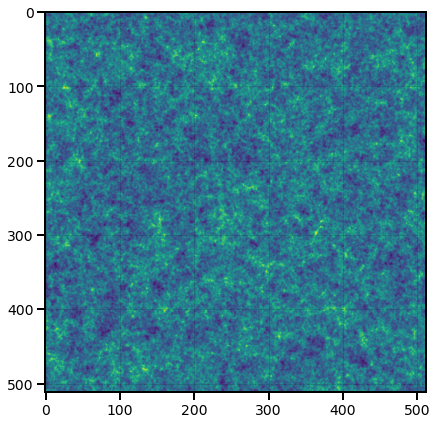

In [16]:
# Visuailzation
plt.imshow(mesh.preview(axes=[0,1]))

In [26]:
# Computing the Power Spectrum
r = FFTPower(mesh, mode='1d')

In [30]:
# the result is stored at "power" attribute
Pk = r.power
print(Pk)

<BinnedStatistic: dims: (k: 512), variables: ('k', 'power', 'modes')>


# Saving Results

In [31]:
# Saving Results
Pk.to_json("./results/PowerSpectrum.json")

# Loading Results

In [32]:
# Loading Results
Pk = BinnedStatistic.from_json("./results/PowerSpectrum.json")

In [33]:
# Just Checking
print(Pk.shape)
print(Pk.dims)
print(Pk.variables)

(512,)
['k']
['k', 'power', 'modes']


In [34]:
# print out the meta-data
for k in Pk.attrs:
    print("{} = {}".format(k, str(Pk.attrs[k])))

Nmesh = [1024 1024 1024]
BoxSize = [1000. 1000. 1000.]
Lx = 1000.0
Ly = 1000.0
Lz = 1000.0
volume = 1000000000.0
mode = 1d
los = [0, 0, 1]
Nmu = 1
poles = []
dk = 0.006283185307179587
kmin = 0.0
kmax = None
N1 = 1073741824
N2 = 1073741824
shotnoise = 0.9313225746154785


Text(0, 0.5, '$P(k)$ [$h^{-3}\\mathrm{Mpc}^3$]')

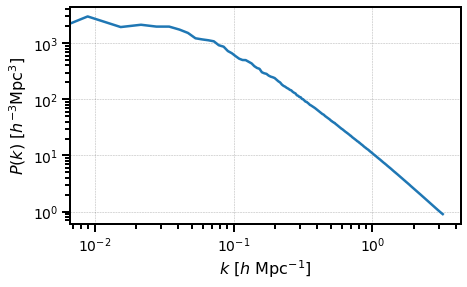

In [35]:
# Ploting the Pecrum
fig, ax = plt.subplots(figsize = (7, 4))


plt.loglog(Pk['k'], Pk['power'].real)

# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]")

# Discrete Fourier Transform

In [36]:
def DFT(x):
    """
    Compute the discrete Fourier Transform of the 1D array x
    :param x: (array)
    """

    N = x.size
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x)

In [37]:
yf = DFT(Pk["power"])

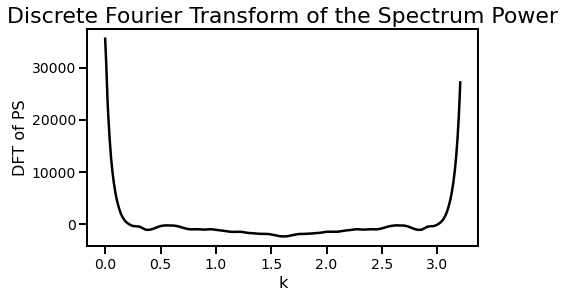

In [38]:
graphFunction(Pk["k"], yf.real, color=["red", "black"], labels=["k", "DFT of PS"], titulo="Discrete Fourier Transform of the Spectrum Power")

In [1]:
hola = [53937543,
54334764,
55300234,
54846825,
54423886,
54395863,
54119528,
54155388,
54431449,
54217148,
54512633,
54954070,
54673414,
54442608,
54342227,
54843828,
54508592,
54668713,
54808325,
37824786]